In [1]:
!pip install opencv-python matplotlib numpy > /dev/null

import cv2
import matplotlib.pyplot as plt
import numpy as np

# 将附带的彩色图像（I0）转为灰度图像（记为I1）。

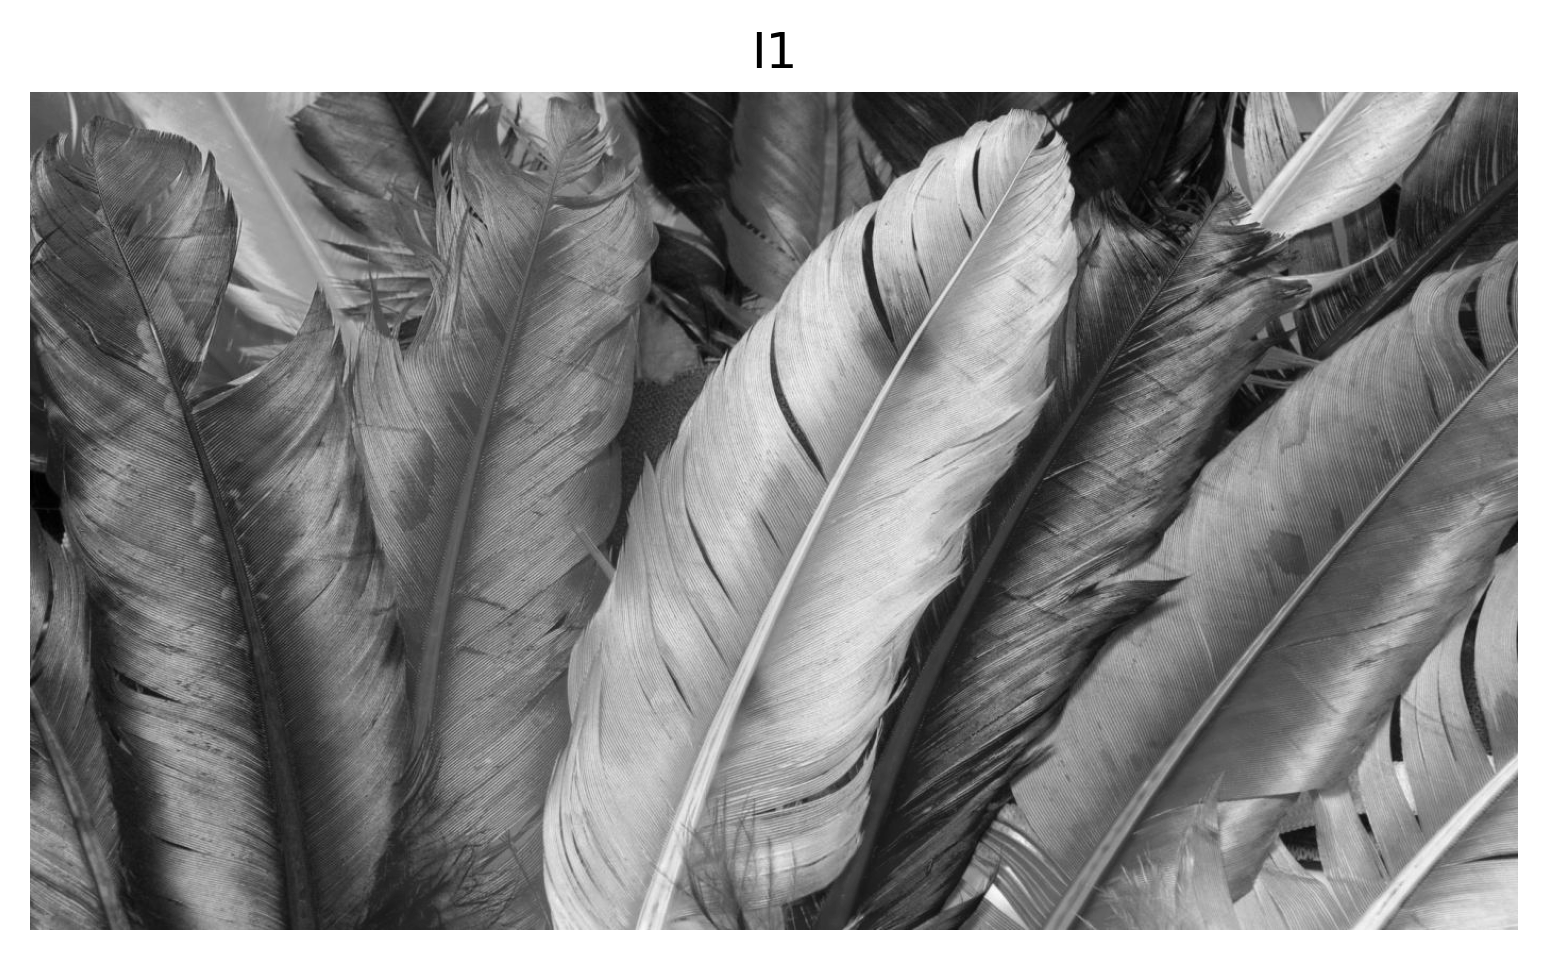

In [2]:
I0 = cv2.imread('./I0.jpg')
I1 = cv2.cvtColor(I0, cv2.COLOR_BGR2GRAY) 

plt.figure(dpi=300)
plt.axis('off')
plt.title('I1')
plt.imshow(I1, cmap='gray')
plt.show()

# 在白纸上手写“CV YYDS”几个字，手机拍照，转为与I1分辨率相同的二值图像（记为I2）。

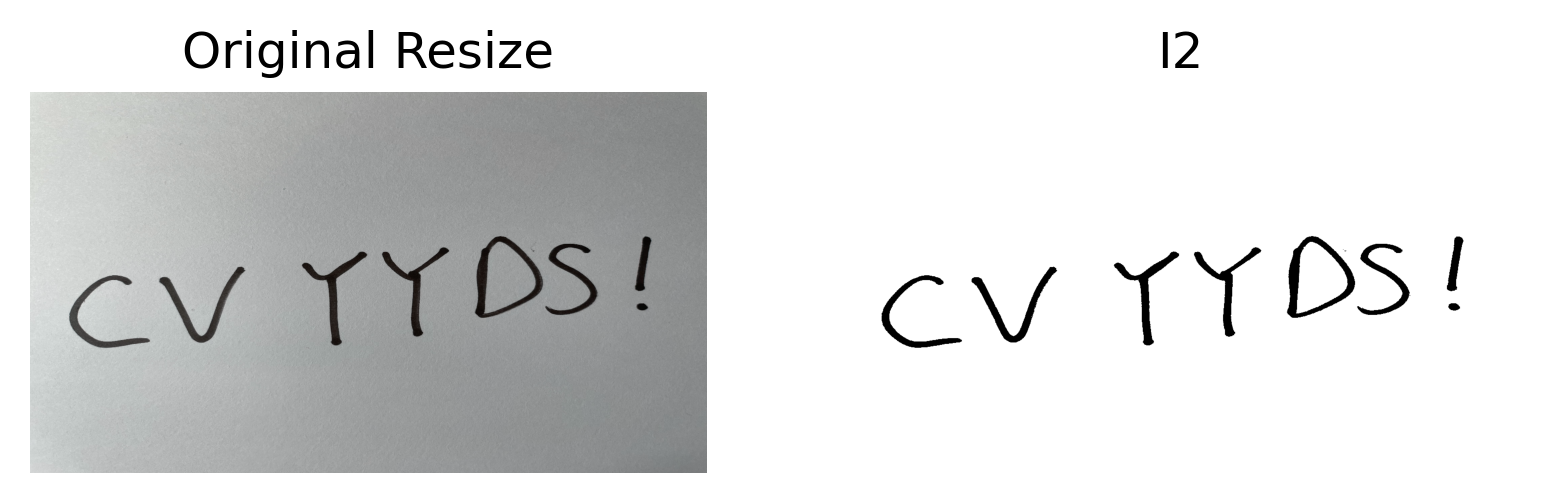

In [3]:
original = cv2.imread('./cv_yyds_original.jpg')
original_resize = cv2.resize(original, (I1.shape[1], I1.shape[0]), interpolation=cv2.INTER_CUBIC)
gray_resize = cv2.cvtColor(original_resize, cv2.COLOR_BGR2GRAY)
_, I2 = cv2.threshold(gray_resize,100,255,cv2.THRESH_BINARY)

plt.figure(dpi=300)
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Resize')
plt.imshow(original_resize)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('I2')
plt.imshow(I2, cmap='gray')
plt.show()

# 灰度图像每个像素的灰度值为1个字节（8位），按照从低到高记为L1、L2、…、L8。将I1中每个像素的L1、L2、…、L8分别用I2替换。对结果进行分析。

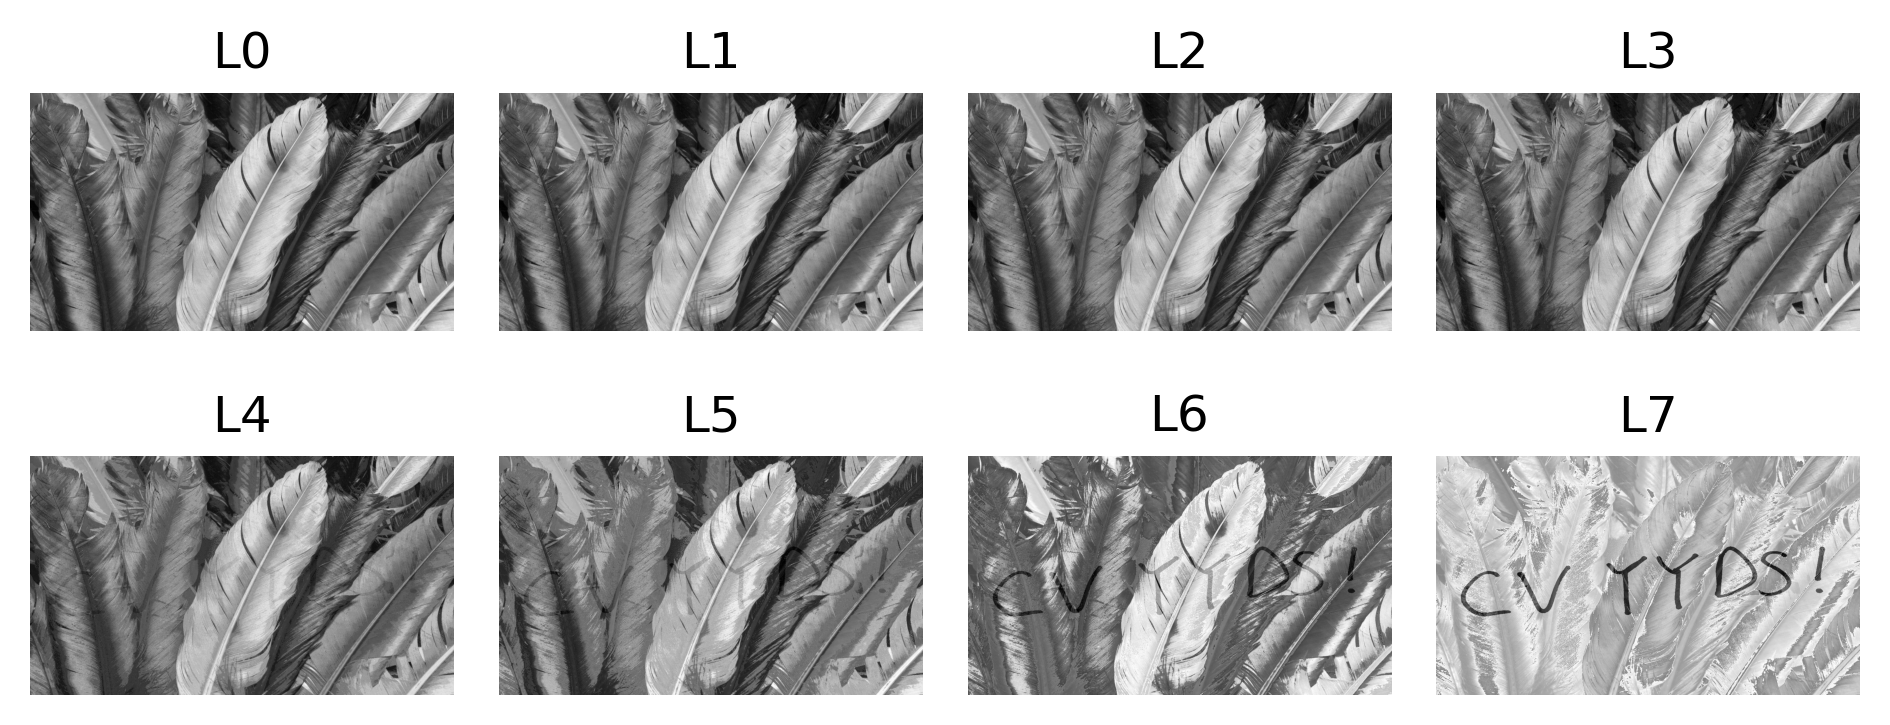

In [4]:
I2_binary = I2 // 255
plt.figure(dpi=300)
for bit in range(8):
    mask = 1 << bit
    I1_modified = (I1 & ~mask) | (I2_binary << bit)
    plt.subplot(2, 4, bit + 1)
    plt.axis('off')
    plt.title(f'L{bit}')
    plt.imshow(I1_modified, cmap='gray')
    
plt.tight_layout()
plt.subplots_adjust(top=2, bottom=1.4)
plt.show()

# 将附带彩色图像（I0）的R、G、B通道中某个或某几个通道做与问题3类似的处理。对结果进行分析。

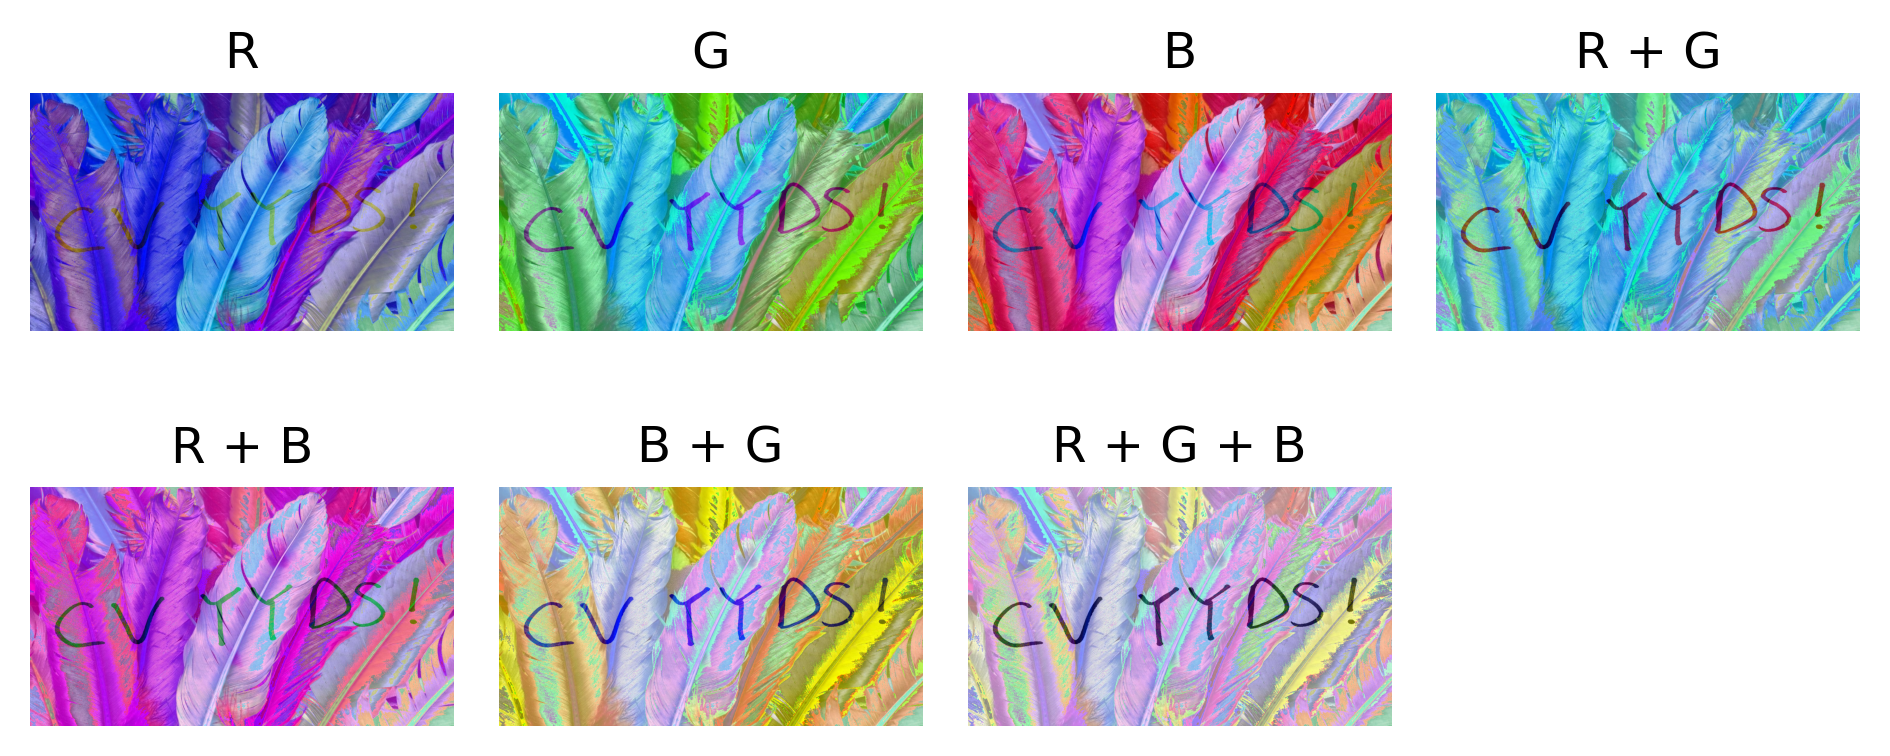

In [5]:
channels = cv2.split(I0)
channels_modified = []
plt.figure(dpi=300)
for channel in channels:
    mask = 1 << 7
    channel_modified = ((channel & ~mask) | (I2_binary << bit)).astype(np.uint8)
    channels_modified.append(channel_modified)
map = {
    'R': [channels[0], channels[1], channels_modified[2]],
    'G': [channels[0], channels_modified[1], channels[2]],
    'B': [channels_modified[0], channels[1], channels[2]],
    'R + G': [channels[0], channels_modified[1], channels_modified[2]],
    'R + B': [channels_modified[0], channels[1], channels_modified[2]],
    'B + G': [channels_modified[0], channels_modified[1], channels[2]],
    'R + G + B': [channels_modified[0], channels_modified[1], channels_modified[2]]
}

i = 1
for k, v in map.items():
    plt.subplot(2, 4, i);
    plt.axis('off')
    plt.title(k)
    plt.imshow(cv2.merge(v))
    i += 1
plt.tight_layout()
plt.subplots_adjust(top=2, bottom=1.4)
plt.show()

# 对附带彩色图像（I0）进行亮度变换、对比度变换、饱和度变换（变换程度自行确定）。对结果进行分析。

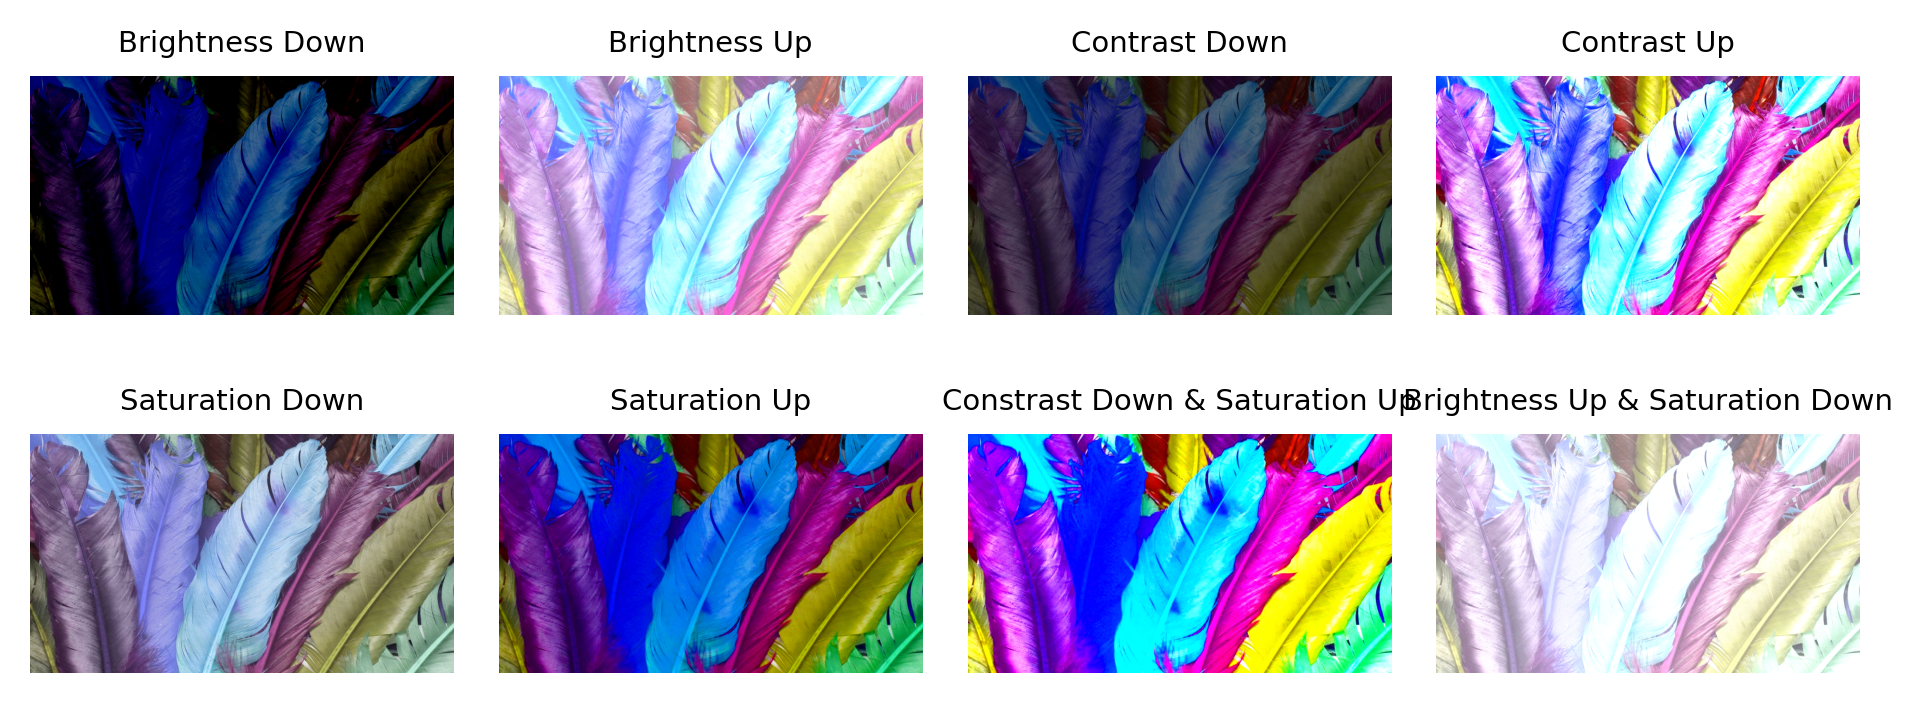

In [6]:
plt.figure(dpi=300)
I0_hsv = cv2.cvtColor(I0, cv2.COLOR_BGR2HSV)
map = {}
map['Brightness Down'] = cv2.addWeighted(I0, 1, I0, 0, -100)
map['Brightness Up'] = cv2.addWeighted(I0, 1, I0, 0, 100)
map['Contrast Down'] = cv2.addWeighted(I0, 0.5, I0, 0, 0)
map['Contrast Up'] = cv2.addWeighted(I0, 2, I0, 0, 0)
map['Saturation Down'] = cv2.cvtColor(cv2.merge([I0_hsv[:, :, 0], cv2.addWeighted(I0_hsv[:, :, 1], 0.5, I0_hsv[:, :, 1], 0, 0), I0_hsv[:, :, 2]]), cv2.COLOR_HSV2BGR)
map['Saturation Up'] = cv2.cvtColor(cv2.merge([I0_hsv[:, :, 0], cv2.addWeighted(I0_hsv[:, :, 1], 2, I0[:, :, 1], 0, 0), I0_hsv[:, :, 2]]), cv2.COLOR_HSV2BGR)
map['Constrast Down & Saturation Up'] = cv2.addWeighted(cv2.cvtColor(cv2.merge([I0_hsv[:, :, 0], cv2.addWeighted(I0_hsv[:, :, 1], 2, I0_hsv[:, :, 1], 0, 0), I0_hsv[:, :, 2]]), cv2.COLOR_HSV2BGR), 2, I0, 0, 0)
map['Brightness Up & Saturation Down'] = cv2.addWeighted(cv2.cvtColor(cv2.merge([I0_hsv[:, :, 0], cv2.addWeighted(I0_hsv[:, :, 1], 0.5, I0_hsv[:, :, 1], 0, 0), I0_hsv[:, :, 2]]), cv2.COLOR_HSV2BGR), 1, I0, 0, 100)

i = 1
for k, v in map.items():
    plt.subplot(2, 4, i);
    plt.axis('off')
    plt.title(k, fontsize=7)
    plt.imshow(v)
    i += 1

plt.tight_layout()
plt.subplots_adjust(top=2, bottom=1.4)
plt.show()